# Where to Invest?

In this project, I create simple exploratory data analysis of startup unicorn data. I will investors where to invest their money.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "unicorns till sep 2022.csv"
df = pd.read_csv(file_path)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
# Number of rows and column
df.shape

(1186, 7)

In [5]:
# Column names
df.columns.tolist()

['Company',
 'Valuation ($B)',
 'Date Joined',
 'Country',
 'City\xa0',
 'Industry',
 'Investors']

In [6]:
# Rename city coloumn
df = df.rename(columns={'City\xa0': 'City'})
df.columns.tolist()

['Company',
 'Valuation ($B)',
 'Date Joined',
 'Country',
 'City',
 'Industry',
 'Investors']

In [7]:
# check null values
df.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

In [8]:
df1 = df[df.isnull().any(axis=1)]
df1

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
10,FTX,$32,7/20/2021,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN
242,HyalRoute,$3.50,5/26/2020,Singapore,Mobile & telecommunications,Kuang-Chi,NaN
316,Amber Group,$3,6/21/2021,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",NaN
346,Moglix,$2.60,5/17/2021,Singapore,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",NaN
371,Coda Payments,$2.50,4/15/2022,Singapore,Fintech,"GIC. Apis Partners, Insight Partners",NaN
482,Advance Intelligence Group,$2,9/23/2021,Singapore,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",NaN
495,Trax,$2,7/22/2019,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",NaN
865,Carousell,$1.10,9/15/2021,Singapore,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",NaN
917,LinkSure Network,$1,1/1/2015,China,Shanghai,Mobile & telecommunications,NaN
941,WeLab,$1,11/8/2017,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",NaN


It seems that there's wrong input. the investors column is empty because the investors values are inputed on industry coloumn, and the industry coloumn values was inputed on city coloumn. So We need to move the data to the appropriate coloumns.

In [9]:

df1.loc[:, 'Investors'] = df1.loc[:, 'Industry']
df1.loc[:, 'Industry'] = df1.loc[:, 'City']
df1.loc[:, 'City'] = ''
df1


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
10,FTX,$32,7/20/2021,Bahamas,,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
242,HyalRoute,$3.50,5/26/2020,Singapore,,Mobile & telecommunications,Kuang-Chi
316,Amber Group,$3,6/21/2021,Hong Kong,,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
346,Moglix,$2.60,5/17/2021,Singapore,,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
371,Coda Payments,$2.50,4/15/2022,Singapore,,Fintech,"GIC. Apis Partners, Insight Partners"
482,Advance Intelligence Group,$2,9/23/2021,Singapore,,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
495,Trax,$2,7/22/2019,Singapore,,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
865,Carousell,$1.10,9/15/2021,Singapore,,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
917,LinkSure Network,$1,1/1/2015,China,,Shanghai,Mobile & telecommunications
941,WeLab,$1,11/8/2017,Hong Kong,,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."


In [10]:
# merge df1 back to df
df.dropna()
df = pd.concat([df,df1])
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [11]:
# Remove currency symbol and change column format of Valuation
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '')
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'])
df.head()


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [12]:
df.describe()

,Valuation ($B)
count,1204.00000
mean,3.25147
std,7.63258
min,1.00000
25%,1.07750
50%,1.58000
75%,3.00000
max,140.00000


In [13]:
# Check the most common investor

from collections import Counter

investor_list = list(df['Investors'].str.split(pat=','))
cleanedList = [x for x in investor_list if str(x) != 'nan']
flat_list = []

for xs in cleanedList:
    for x in xs:
        flat_list.append(x)

investor_data = Counter(flat_list)
investor_data.most_common()

[(' Tiger Global Management', 42),
 (' Accel', 34),
 ('Andreessen Horowitz', 33),
 (' Sequoia Capital', 33),
 (' Insight Partners', 31),
 ('Sequoia Capital China', 30),
 ('Accel', 29),
 (' General Catalyst', 27),
 (' Andreessen Horowitz', 26),
 (' Lightspeed Venture Partners', 25),
 ('Insight Partners', 25),
 (' SoftBank Group', 22),
 (' Google Ventures', 20),
 ('Sequoia Capital', 20),
 (' Index Ventures', 19),
 (' General Atlantic', 19),
 (' Sequoia Capital China', 18),
 (' IDG Capital', 18),
 (' Tencent Holdings', 18),
 ('New Enterprise Associates', 18),
 (' Coatue Management', 17),
 ('Tiger Global Management', 15),
 (' DST Global', 15),
 ('General Catalyst', 15),
 (' Y Combinator', 15),
 (' Bessemer Venture Partners', 15),
 (' Kleiner Perkins Caufield & Byers', 14),
 (' Sequoia Capital India', 14),
 ('Lightspeed Venture Partners', 14),
 ('Index Ventures', 14),
 (' Founders Fund', 14),
 (' Battery Ventures', 13),
 ('Tencent Holdings', 13),
 ('SoftBank Group', 13),
 ('Bessemer Venture

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10204\1738165150.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Fintech'),
 Text(1, 0, 'Internet software & services'),
 Text(2, 0, 'E-commerce & direct-to-consumer'),
 Text(3, 0, 'Artificial intelligence'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'Health'),
 Text(6, 0, 'Supply chain, logistics, & delivery'),
 Text(7, 0, 'Cybersecurity'),
 Text(8, 0, 'Data management & analytics'),
 Text(9, 0, 'Auto & transportation')]

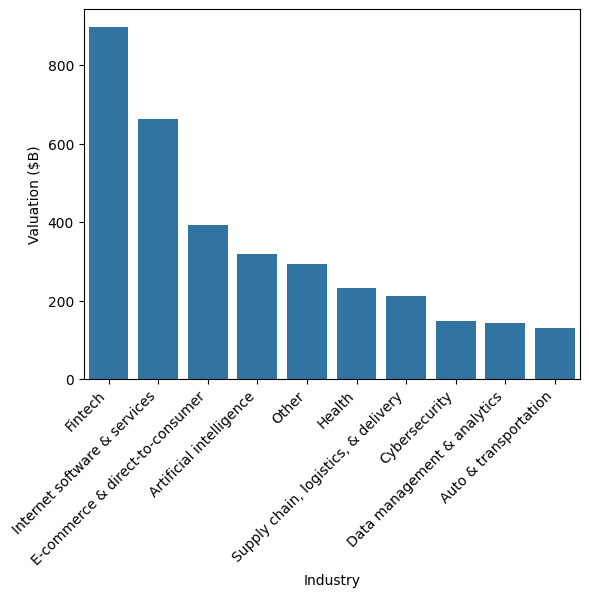

In [28]:
# Top 10 industry
best_industry = df.groupby(['Industry']).sum().sort_values(by = 'Valuation ($B)', ascending=False)
top10_industry = best_industry['Valuation ($B)'].head(10)
plot = sns.barplot(top10_industry)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10204\782556978.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  country_plot.set_xticklabels(country_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'United States'),
 Text(1, 0, 'China'),
 Text(2, 0, 'India'),
 Text(3, 0, 'United Kingdom'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Singapore'),
 Text(6, 0, 'France'),
 Text(7, 0, 'Israel'),
 Text(8, 0, 'Canada'),
 Text(9, 0, 'South Korea')]

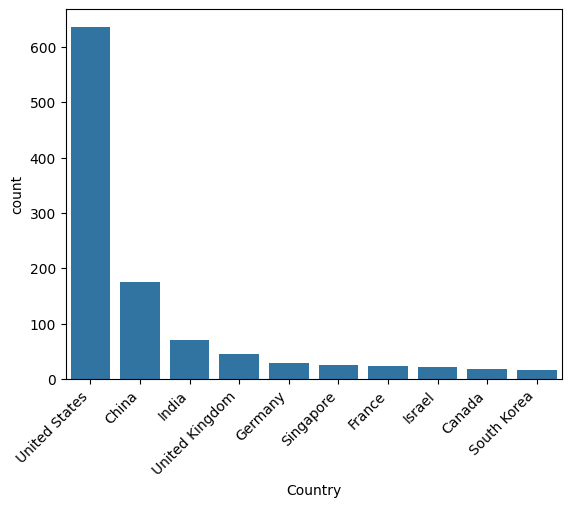

In [36]:
# Top 10 Country
top10_country = df['Country'].value_counts().head(10)

country_plot = sns.barplot(top10_country)
country_plot.set_xticklabels(country_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

## Conclusion

Investing in fintech, Internet software & services, 'E-commerce & direct-to-consumer' 'Artificial intelligence' that located in US, china, India will be most promising investment for the investor.